# Elements of convex analysis

## Class 6: StochasticGradient Descent

The purpose of this notebook is to implement Stochastic Gradient Descent variants for a regression problem.
The notebook will use helper functions (in [eco_hw4_helpers.py](eco_hw4_helperss.py) file, but there is no need to look at it).

This exercise requires **numpy**, **matplotlib**, **seaborn** and **[autograd](https://github.com/HIPS/autograd)** libraries.

In [1]:
# a line making the graphs show up in the notebook
# you can safely ignore it (but run it!).
%matplotlib inline

# Some important imports:
from eco_hw4_helpers import plot_1d_regression_path, plot_1d_regression_lines, generate_1d_regression_data

import numpy as np
import numpy as np
from autograd import grad
import autograd.numpy as anp
import matplotlib.pyplot as plt

First create some  predefined data for linear regression.
x is our set of object with features (actually only one feature this time).
y is the variable we want to predict based on x.

In [2]:
x, y = generate_1d_regression_data()

Plot the data perhaps


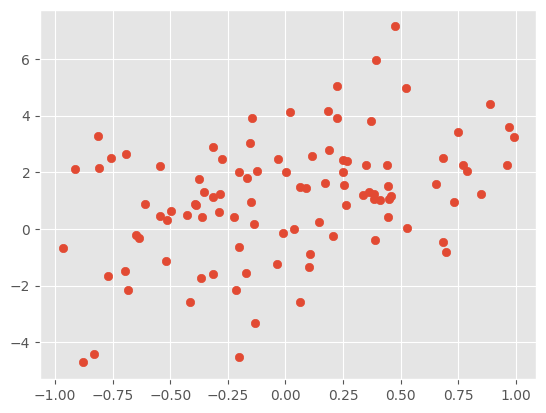

In [3]:
plt.scatter(x, y)
plt.show()

## Your task is to implement linear regression with mean squared error and solve it using exact solution and three versions of gradient descent (batch, minibatch and online).

$$ argmin_{a,b \in R } \frac{1}{2n}\sum\limits_{i=0}^{n-1}(ax + b - y)^2$$

Note that input vectors are 1-dimensional (they are scalars)
but the problem of optimization itself is 2-dimensional as we are
optimizing w.r.t. the slope (a coefficient) and bias term (intercept).



Your implementations should return a list of tuples (a,b) which were
encountered by the algorithm in iterations.
This will let you use the visualisation functions.

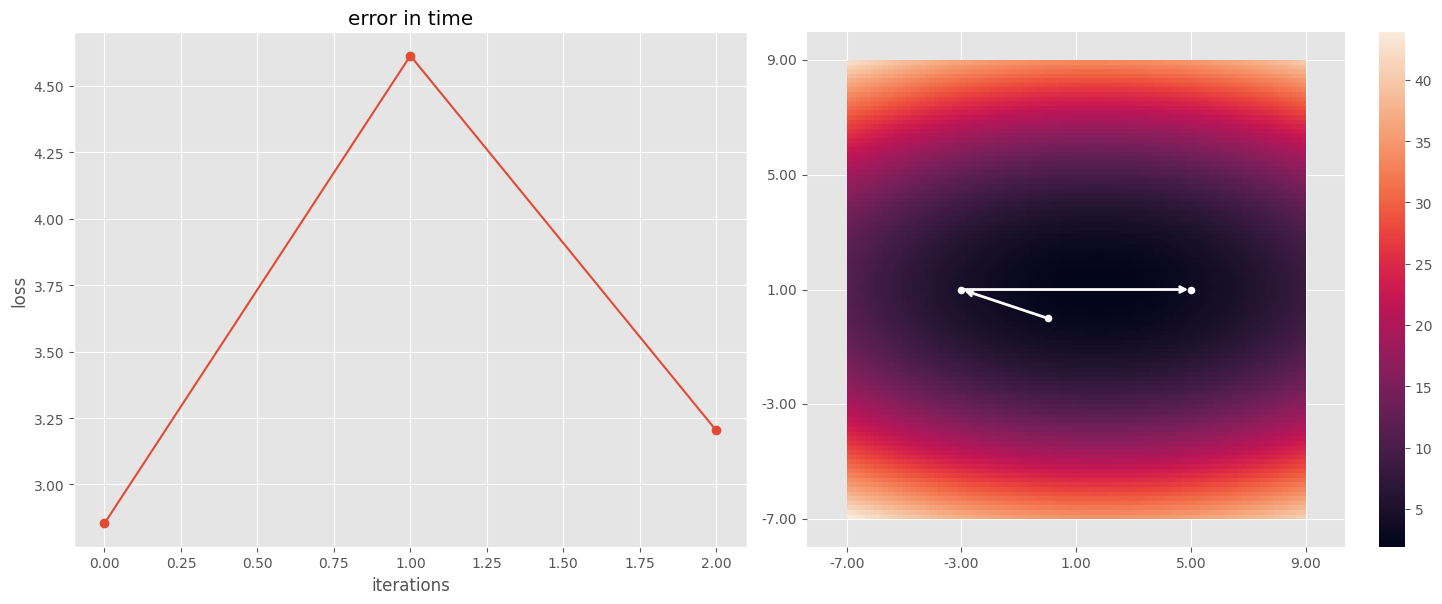

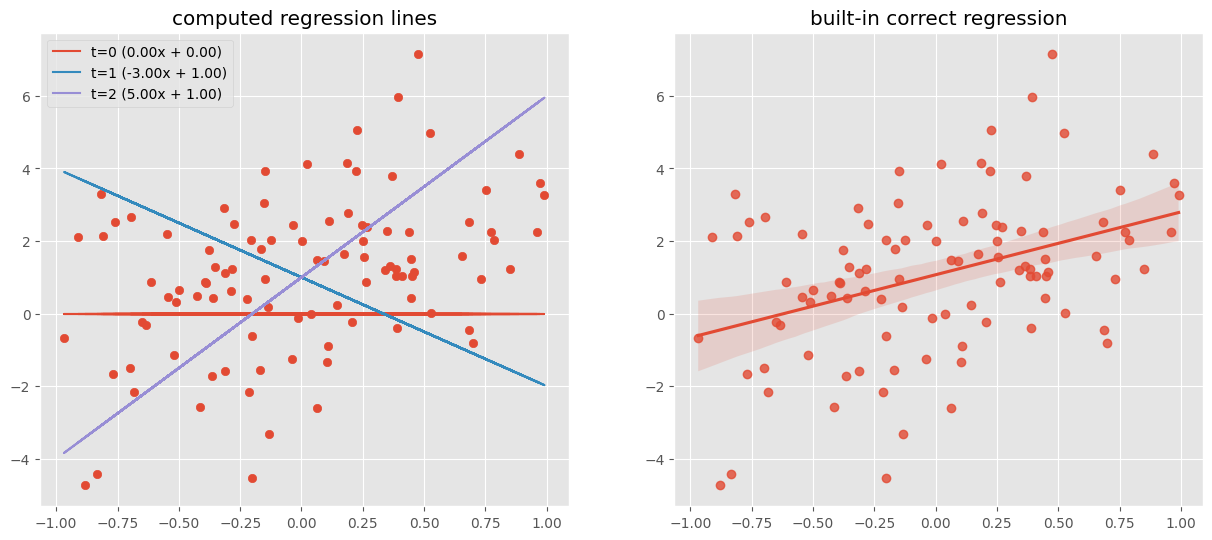

In [4]:
sample_points = [(0,0),(-3,1),(5,1)]
plot_1d_regression_path(x, y, sample_points)
plot_1d_regression_lines(x, y, sample_points)

Test different number of iterations, batchsizes, starting points and learning rates.
Some propositions: $x_0=(0,0)$, $\eta_0 = 0.1$, 5 iterations, batchsizes $
\{5,10,20\}$

In [5]:
def mse(params, x, y):
    a, b = params
    preds = a * x + b
    errors = preds - y
    return 0.5 * np.dot(errors, errors) / x.shape[0]

grad_mse = grad(mse)

def sgd(x, y, iters, a0, b0, batchsize, lr):
    params = np.array([a0, b0])
    n = len(x)
    path = [tuple(params)]
    
    for _ in range(iters):
        idx = np.random.choice(n, batchsize, replace=False)
        x_batch = x[idx]
        y_batch = y[idx]
        grads = grad_mse(params, x_batch, y_batch)
        params -= lr * grads
        path.append(tuple(params))
        
    return path

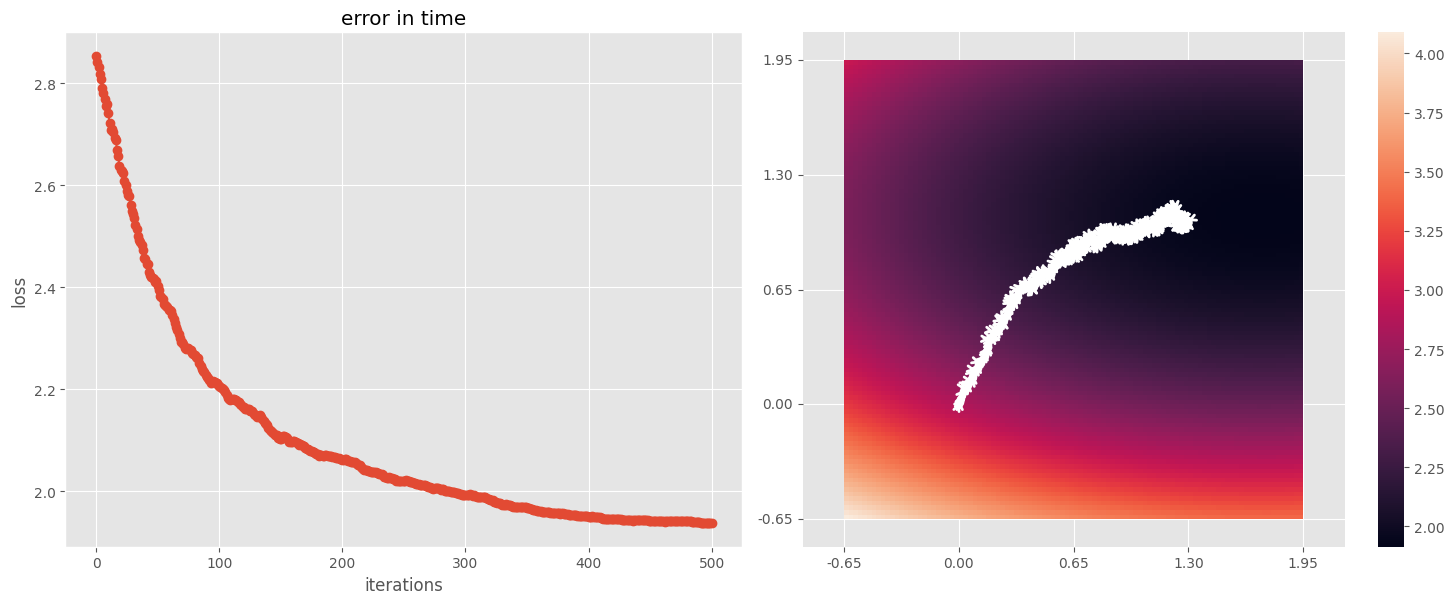

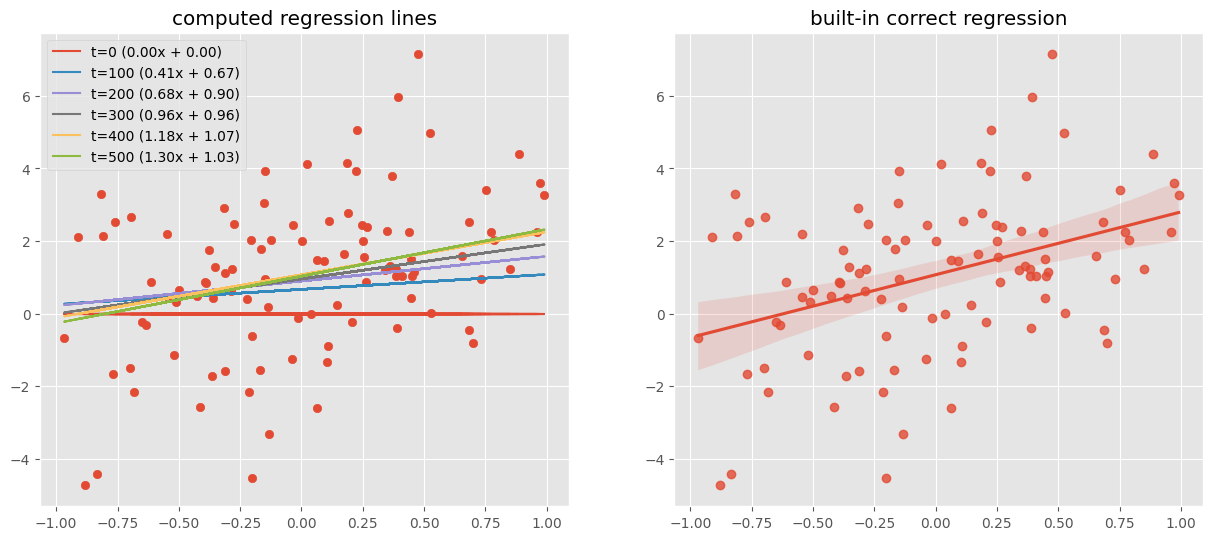

In [6]:
path = sgd(x, y, iters=500, a0=0.0, b0=0.0, batchsize=10, lr=0.01)
plot_1d_regression_path(x, y, path)
plot_1d_regression_lines(x, y, path)

In [7]:
def ogd(x, y, iters, a0, b0, lr):
    params = np.array([a0, b0])
    n = len(x)
    path = [tuple(params)]

    for i in range(iters):
        idx = i % n
        x_i = x[idx:idx+1]
        y_i = y[idx:idx+1]
        grads = grad_mse(params, x_i, y_i)
        params -= lr * grads
        path.append(tuple(params))

    return path

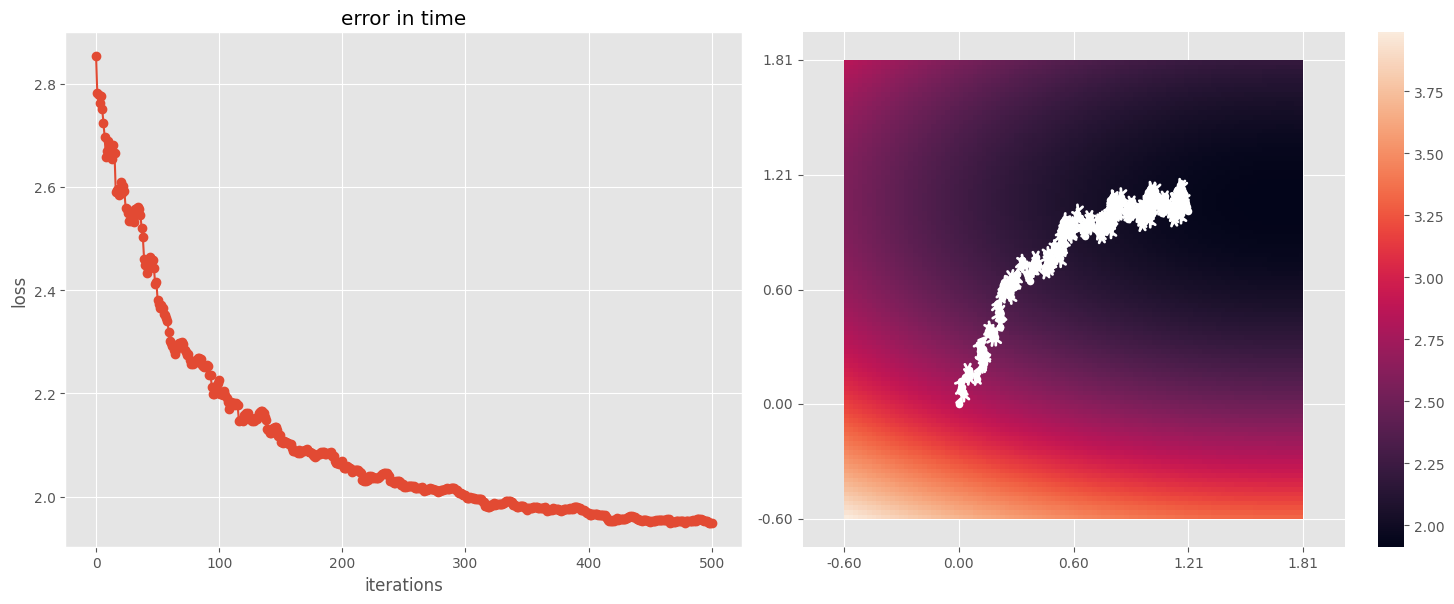

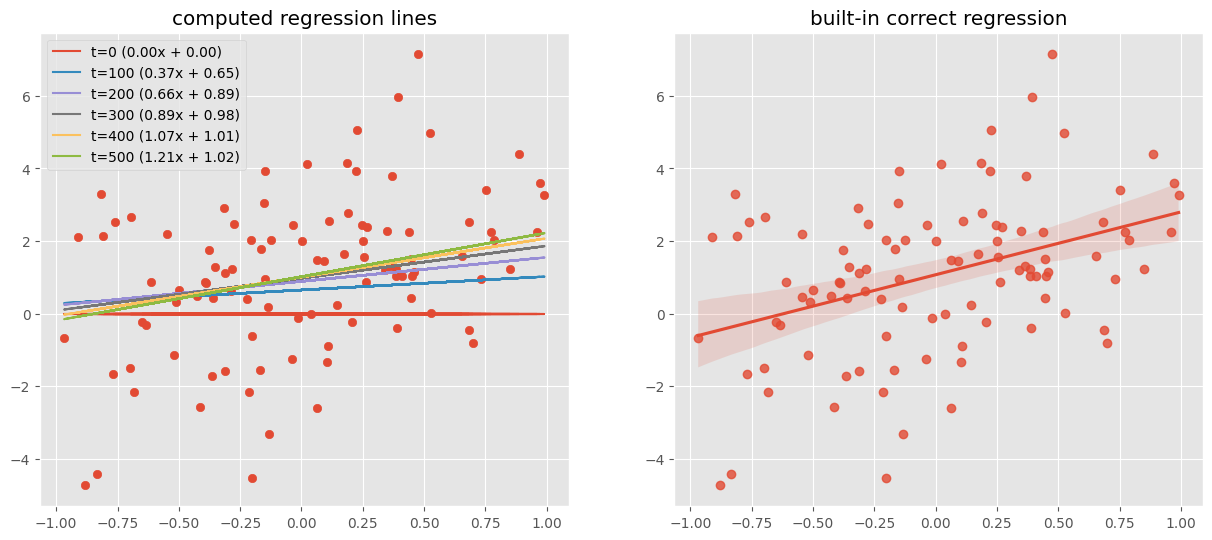

In [8]:
path = ogd(x, y, iters=500, a0=0.0, b0=0.0, lr=0.01)
plot_1d_regression_path(x, y, path)
plot_1d_regression_lines(x, y, path)

In [9]:
def gd(x, y, iters, a0, b0, lr):
    params = np.array([a0, b0])
    path = [tuple(params)]
    
    for _ in range(iters):
        grads = grad_mse(params, x, y)
        params -= lr * grads
        path.append(tuple(params))
        
    return path

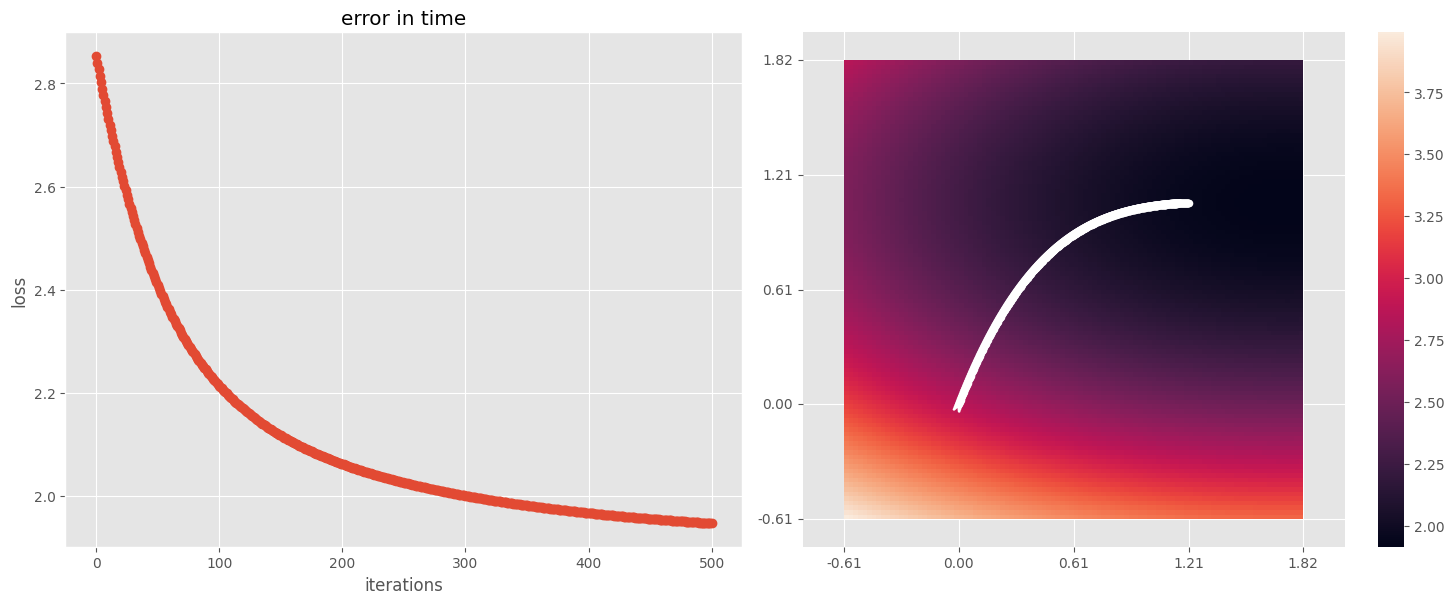

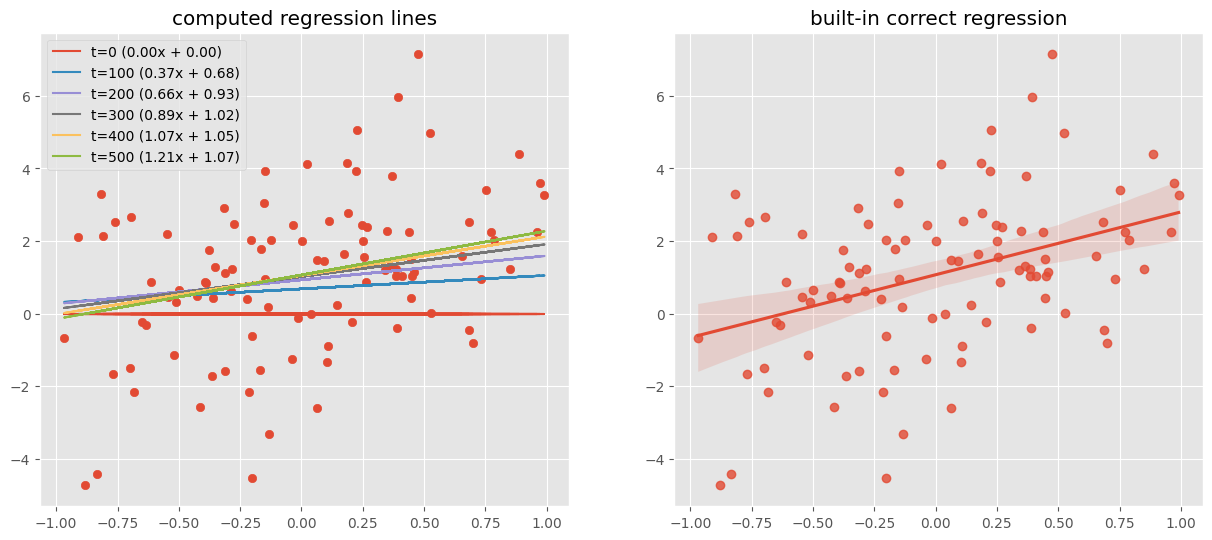

In [10]:
path = gd(x, y, iters=500, a0=0.0, b0=0.0, lr=0.01)
plot_1d_regression_path(x, y, path)
plot_1d_regression_lines(x, y, path)